# Lab. 7 - K-Means and the LLoid algorithm

In this lab we consider unsupervised settings, and more specifically the problem of data clustering using K-means.

As usual, we start including libraries and utility functions.

In [1]:
# import libraries
%matplotlib inline
# Garbarino Giacomo s4545532
# Coronado Andres s2761046
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as la
import random

In [2]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                    size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

In [3]:
def EuclidDistance(P1,P2):
    v = np.linalg.norm(P1-P2,2)
    return v**2

In [4]:
def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for idx1 in range(np.shape(X1)[0]):
        for idx2 in range(np.shape(X2)[0]):
            D[idx1,idx2] = EuclidDistance(X1[idx1,:],X2[idx2,:])
    return D

##### The Lloid algorithm

We now focus on the implementation of the LLoid algorithm. The arguments of the function are:
- X: the data matrix
- centers0: the initialization of the cluster centers
- maxiter: the maximum number of iterations
The function returns the final clusters centers and the labels associated with each point.


In [5]:
def Lloid(X, centers, maxiter):
    
    # random centers
    n, dim = np.shape(X)
    
    k = np.shape(centers)[0]
    
    idx_prev = np.zeros(n) # 1xn vector storing cluster assignments
    
    for i in np.arange(maxiter):
        
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        
        all_distances = allDistances(X, centers)
        
        # Assign data to clusters: 
        # for each point, find the minimum distance and the associated center

        for j in range(n):
            idx_prev[j] = np.argmin(all_distances[j])
        
        # Update cluster center
        for c in np.arange(k):
            summ = 0
            f = 0
            for p in range(n):
                if idx_prev[p]==c:
                    summ = summ + X[p]
                    f+=1
            centers[c] = summ / f
        
        
    return idx_prev, centers


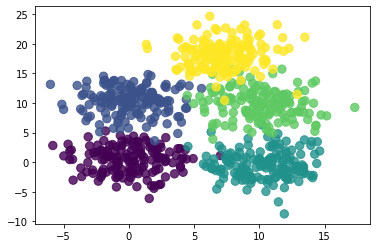

In [6]:
# Build a dataset with at least 4 classes and plot it
means = [[0,0],[0,10],[10,0],[10,10],[7,18]]
sigmas = [2.3, 2.3, 2.3, 2.3, 2.3]
X, Y = mixGauss(means, sigmas, 150)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)

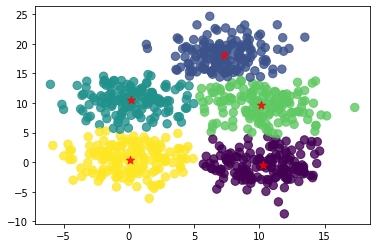

In [7]:
# Try with a random initialization of the centers.
k = 5
dim = np.shape(X)[1]
centers0 = np.empty((k,dim))

for i in range(k):
    centers0[i] = X[random.randint(0, X.shape[0])]

# Call the Lloid function
Iv, centers = Lloid(X, centers0, 10)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='r', marker='*', alpha=0.8)

# NOTE: TRY MULTIPLE TIMES!

##### K-Means++

We now consider a better strategy to initialize the centers of the clusters, i.e. selecting points with maximum distance among them. Have a look to the following function.

In [8]:
def kMeanspp(X,k):

    n, d = np.shape(X)

    IdxC = np.random.permutation(np.shape(X)[0])
    
    centers = np.zeros((k,d))

    centers[0,:] = X[IdxC[0],:]

    for i in np.arange(1,k):
        
        D = allDistances(centers[:i,:], X)
        idx = np.argmin(D,axis=0)
        Ds = np.min(D,axis=0)

        D2 = Ds**2
        P = np.divide(D2, np.sum(D2))
        
        newcpos = np.argmax(P)
        centers[i,:] = X[newcpos,:]
        
    return centers

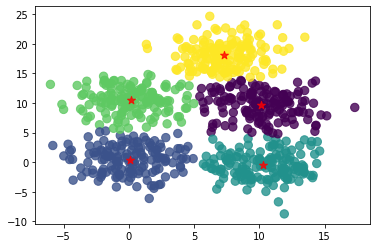

In [9]:
# Try and use K-Means++ for initialization
k = 5
centers0 = kMeanspp(X, k)

# Call the Lloid function
Iv, centers = Lloid(X, centers0, 10)

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='r', marker='*', alpha=0.8)